# Classification Models with Keras

### Objective for this Notebook
1. Use of MNIST database for training various image processing systems
2. Build a Neural Network 
3. Train and Test the Network. 

### Table of Contents
* Import Keras and Packages
* Build a Neural Network
* Train and Test the Network

### Import Keras and Packages

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

### Read the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
print('Total Number of Images: {}'.format(X_train.shape[0]))
print('Each Image is: {} by {}'.format(X_train.shape[1], X_train.shape[2]))

Total Number of Images: 60000
Each Image is: 28 by 28


### Visualiziing of first image in the training set

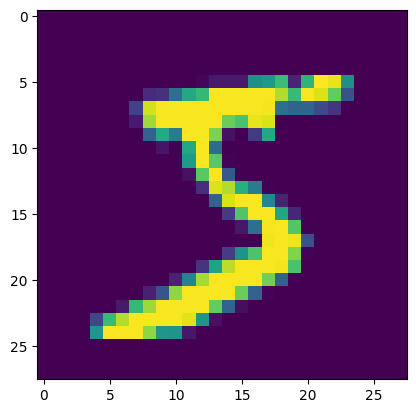

In [7]:
plt.imshow(X_train[0])

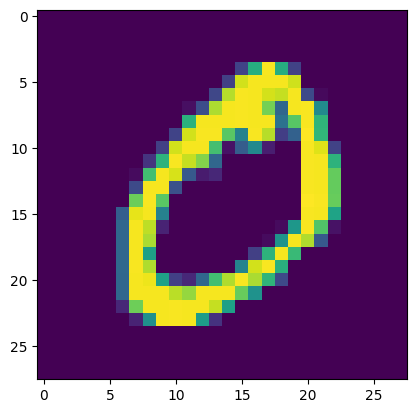

In [8]:
plt.imshow(X_train[1])

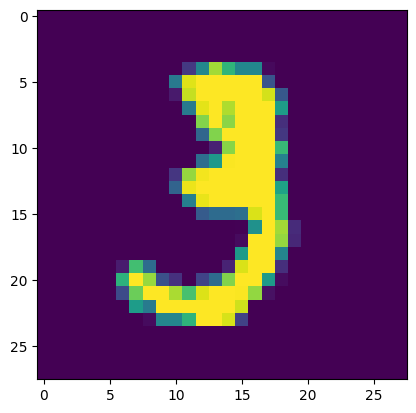

In [9]:
plt.imshow(X_train[10])

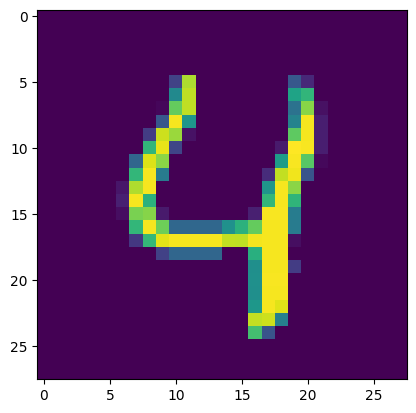

In [10]:
plt.imshow(X_test[4])

### Flatten the images into one-dimensional vectors
Each of size 1 x (28 x 28) = 1 x 784

In [11]:
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

Flatten training images

In [12]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

Flatten test images

In [13]:
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

Normalize the vectors to be between 0 and 1 since pixel values range from 0 to 255

In [14]:
#Normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

Divide our target variable into categories for classification

In [15]:
#Use the to_categorical function from the Keras Utilities package

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Build a Neural Network

In [16]:
# define classification model

def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Train and Test the Network

In [25]:
# build the model
model = classification_model()

#Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, verbose=2)

#Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/15
1875/1875 - 38s - loss: 0.1861 - accuracy: 0.9443 - val_loss: 0.0934 - val_accuracy: 0.9695 - 38s/epoch - 20ms/step
Epoch 2/15
1875/1875 - 37s - loss: 0.0789 - accuracy: 0.9754 - val_loss: 0.0810 - val_accuracy: 0.9752 - 37s/epoch - 20ms/step
Epoch 3/15
1875/1875 - 39s - loss: 0.0541 - accuracy: 0.9825 - val_loss: 0.0848 - val_accuracy: 0.9752 - 39s/epoch - 21ms/step
Epoch 4/15
1875/1875 - 38s - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0827 - val_accuracy: 0.9795 - 38s/epoch - 20ms/step
Epoch 5/15
1875/1875 - 36s - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0711 - val_accuracy: 0.9817 - 36s/epoch - 19ms/step
Epoch 6/15
1875/1875 - 39s - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0906 - val_accuracy: 0.9781 - 39s/epoch - 21ms/step
Epoch 7/15
1875/1875 - 42s - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0918 - val_accuracy: 0.9752 - 42s/epoch - 22ms/step
Epoch 8/15
1875/1875 - 42s - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0827 - val_accuracy: 0.9811 - 42s/ep

In [26]:
print('Accuracy Score: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy Score: 0.9818999767303467% 
 Error: 0.01810002326965332


In [21]:
model.save('classificaition_model.h5')

### To use the model
Load the model with load_model

In [23]:
from keras.models import load_model

In [24]:
pretrained_model = load_model('classificaition_model.h5')